[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PyMPDATA-examples.git/main?urlpath=lab/tree/PyMPDATA_examples%2FSmolarkiewicz_1984/figs_13-14.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PyMPDATA-examples/blob/main/PyMPDATA_examples/Smolarkiewicz_1984/figs_13-14.ipynb)

In [1]:
# 3D example as in:
# - Smolarkiewicz 1984, Figs 13-14
# - Smolarkiewicz and Szmelter 2005
# - Jaruga et al. 2015, Fig. 13
#   (https://github.com/igfuw/libmpdataxx/blob/master/tests/paper_2015_GMD/4_revolving_sphere_3d)

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [3]:
import numpy as np
from matplotlib import pyplot
from PyMPDATA import ScalarField, VectorField, Options, Solver, Stepper
from PyMPDATA.boundary_conditions import Constant
from atmos_cloud_sim_uj_utils import show_plot

In [4]:
nt = 556
nx = 59

grid = (nx, nx, nx)

In [5]:
options = Options(n_iters=2)
bcs = tuple([Constant(0) for _ in grid])

In [6]:
dt = 0.018 * 2 * np.pi
L = 100
dx = L / nx
dy = dx
dz = dx
h = 4
r = 15
d = 25 / np.sqrt(3)
x0 = 50 - d
y0 = 50 + d
z0 = 50 + d
  
# sphere shape
i,j,k = np.indices(grid)
dist = (i * dx - x0)**2 + (j * dx - y0)**2 + (k * dx - z0)**2
advectee = ScalarField(
    data=np.asarray(np.where(dist - pow(r, 2) <= 0, h, 0), dtype=options.dtype), 
    halo=options.n_halo, 
    boundary_conditions=bcs
)

In [7]:
omega = 0.1
xc = 50
yc = 50
zc = 50

data = [None, None, None]

# constant angular velocity rotational field
for index, letter in enumerate(('x', 'y', 'z')):
    i,j,k = np.indices((g+(gi==index) for gi, g in enumerate(grid)))
    if letter=='x':
        data[index] = (-(j * dy - yc) + (k * dz - zc)) / dx
    elif letter=='y':
        data[index] = ( (i * dx - xc) - (k * dz - zc)) / dy
    elif letter=='z':
        data[index] = (-(i * dx - xc) + (j * dy - yc)) / dz
    data[index] *= omega / np.sqrt(3) * dt
        
advector = VectorField(
    data=data,
    halo=options.n_halo,
    boundary_conditions=bcs
)

In [8]:
stepper = Stepper(options=options, grid=grid)
solver = Solver(stepper=stepper, advectee=advectee, advector=advector)

In [9]:
def plot(advectee, title):
    ax = pyplot.figure(figsize=(10,10)).add_subplot(projection='3d')
    ax.voxels(advectee.get() > .5, edgecolor='k')
    for index, letter in enumerate(('x', 'y', 'z')):
        getattr(ax, f"set_{letter}lim")(0, grid[index])
        getattr(ax, f"set_{letter}label")(f'{letter}/d{letter}')
    pyplot.title(title)

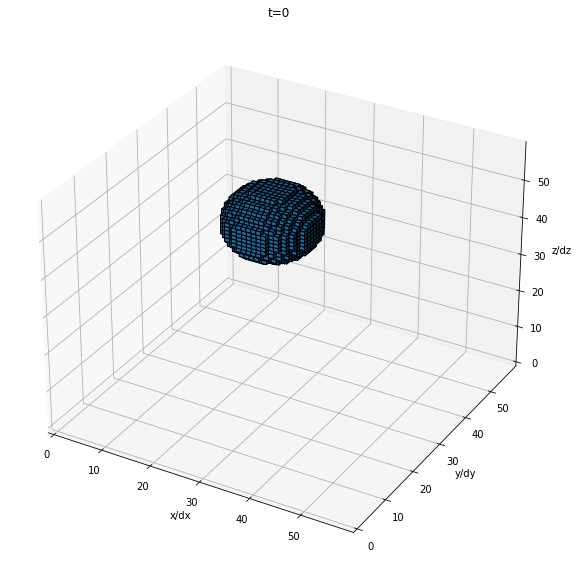

HTML(value="<a href='./tmpy93hvamy.pdf' target='_blank'>./tmpy93hvamy.pdf</a><br>")

In [10]:
plot(solver.advectee, title="t=0")
show_plot()

In [11]:
_ = solver.advance(nt=nt)

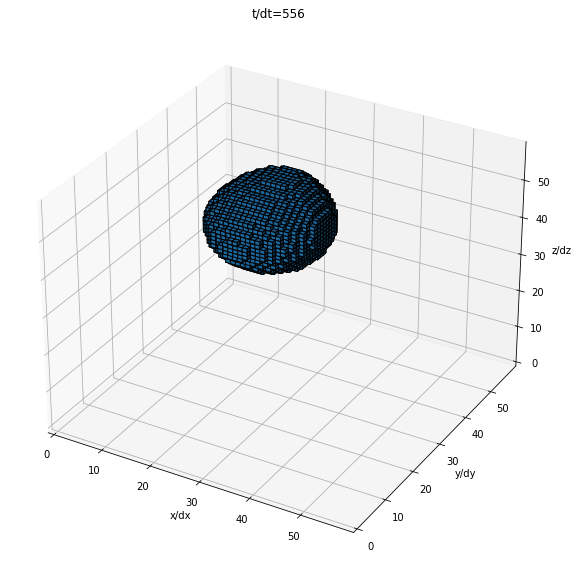

HTML(value="<a href='./tmpmbz11jv_.pdf' target='_blank'>./tmpmbz11jv_.pdf</a><br>")

In [12]:
plot(solver.advectee, title=f"t/dt={nt}")
show_plot()